In [4]:
from openbb import obb
obb.user.preferences.output_type = 'dataframe'
data = obb.equity.price.historical('SPY', provider='yfinance')
print(data)

                  open        high         low       close    volume  dividend
date                                                                          
2024-07-12  557.630005  563.669983  557.150024  559.989990  53084400       0.0
2024-07-15  562.030029  564.840027  559.630005  561.530029  40584300       0.0
2024-07-16  562.869995  565.159973  562.099976  564.859985  36475300       0.0
2024-07-17  558.799988  560.510010  556.609985  556.940002  57119000       0.0
2024-07-18  558.510010  559.520020  550.429993  552.659973  56270400       0.0
...                ...         ...         ...         ...       ...       ...
2025-07-07  623.359985  624.030029  617.869995  620.679993  74814500       0.0
2025-07-08  621.349976  622.109985  619.520020  620.340027  59024600       0.0
2025-07-09  622.770020  624.719971  620.909973  624.059998  66113300       0.0
2025-07-10  624.200012  626.869995  623.010010  625.820007  57529000       0.0
2025-07-11  622.739990  624.859985  621.530029  623.

In [7]:
data = obb.equity.fundamental.metrics('AAPl,AMZN', provider='yfinance')

data_t = data.T

data_t


,0,1
symbol,AAPL,AMZN
market_cap,3153843453952.0,2388902281216.0
pe_ratio,32.890965,36.64821
forward_pe,25.410349,36.58862
peg_ratio_ttm,1.9689,2.9254
enterprise_to_ebitda,22.425,18.966
earnings_growth,0.078,0.622
earnings_growth_quarterly,0.048,0.642
revenue_per_share,26.455,61.785
revenue_growth,0.051,0.086


In [10]:
obb.equity.compare.groups(group ='sector', metric = 'overview', provider='finviz')


,name,market_cap,performance_1d,dividend_yield,pe,forward_pe,peg,float_short,volume,Stocks
0,Healthcare,7461230000000,-0.0114,0.0176,27.69,16.21,1.77,0.0516,1170000000,1137
1,Financial,13338110000000,-0.0099,0.0189,18.87,15.29,1.73,0.0158,1480000000,961
2,Technology,23565130000000,-0.0047,0.0062,41.66,27.07,2.17,0.0312,2320000000,772
3,Consumer Defensive,4236450000000,-0.0039,0.0248,26.96,20.36,3.65,0.0213,743580000,248
4,Industrials,6423210000000,-0.0032,0.0121,27.89,22.22,2.46,0.0469,855000000,677
5,Communication Services,9273330000000,-0.0027,0.0068,33.81,26.77,2.37,0.0284,544010000,275
6,Utilities,1639340000000,-0.0020,0.0328,20.09,16.19,2.26,0.0226,179700000,106
7,Real Estate,1706810000000,-0.0013,0.0376,41.33,30.86,2.48,0.0465,279810000,262
8,Basic Materials,2142530000000,-0.0009,0.0217,22.95,15.38,1.98,0.0283,710990000,273
9,Consumer Cyclical,8644010000000,0.0007,0.0083,26.74,21.59,1.56,0.0506,1320000000,572


<Axes: xlabel='expiration'>

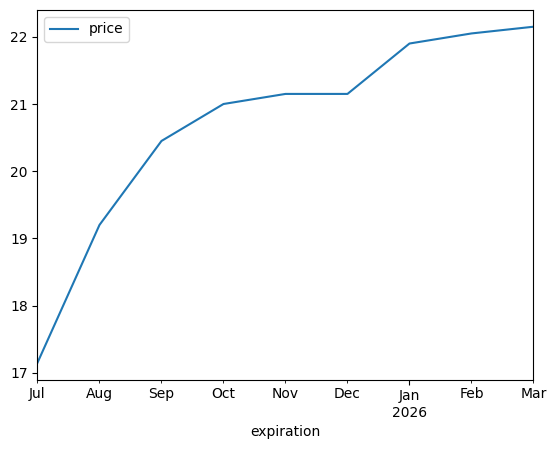

In [12]:
import pandas as pd
n_data= obb.derivatives.futures.curve(symbol='VX')
n_data.index = pd.to_datetime(n_data.expiration)
n_data.plot()

In [22]:
contracts = []

df = (obb.derivatives.futures.historical(symbol='CL=F',
                                            start_date='2020-01-01',
                                            end_date='2022-12-31',
                                            provider="yfinance"
                                            ))
contracts.append(df['close'])

historical = (pd.DataFrame(contracts).transpose().dropna())
historical

,close
date,
2020-01-02,61.180000
2020-01-03,63.049999
2020-01-06,63.270000
2020-01-07,62.700001
2020-01-08,59.610001
...,...
2022-12-23,79.559998
2022-12-27,79.529999
2022-12-28,78.959999


<Axes: xlabel='date'>

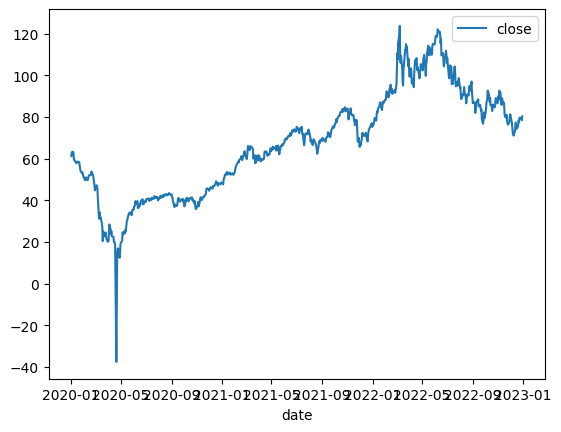

In [23]:
historical.plot()